## Estadística Aplicada

Sesión 19 - 18 octubre

Patricio Ruiz Rodriguez    1897914     Gpo. 41

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
#Estimar el modelo Arima
from statsmodels.tsa.arima.model import ARIMA

In [26]:
plt.rcParams['figure.figsize']=(10,6)

In [18]:
igae_sa=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/igae_deses.csv')

In [20]:
#Dar formato de fecha
igae_sa['meses']=pd.to_datetime(igae_sa['meses'],format='%Y/%m')

In [21]:
#Hacerlo index
igae_sa=igae_sa.set_index('meses')

In [23]:
igae_sa=igae_sa.asfreq('MS')

ARIMA (SERIE SIN EFECTO ESTACIONARIO)
SARIMA (SERIES CON COMPONENTE ESTACIONARIO)

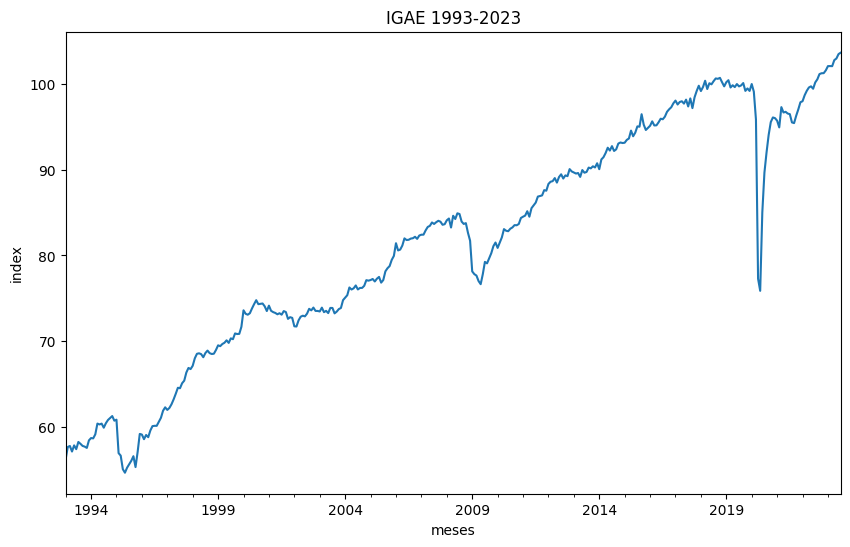

In [28]:
igae_sa['IGAE_DESES'].plot()
plt.title('IGAE 1993-2023')
plt.ylabel('index');

In [32]:
## prueba de Dickey_fuller aumentada
#H0: No estacionario
#H1: Estacionaria
df_test=adfuller(igae_sa['IGAE_DESES'])
pvalue=df_test[1] #p-valor

## No rechazamos H0 signiifca que la serie es no estacionaria

In [34]:
## Hacer la serie estacioanaria
igae_sa['IGAE_DIFF']=igae_sa['IGAE_DESES'].diff()

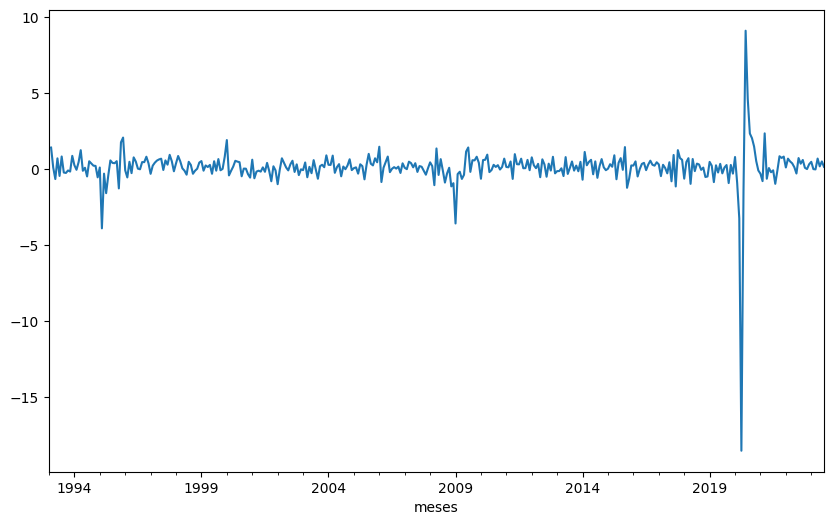

In [35]:
igae_sa['IGAE_DIFF'].plot();

In [38]:
df_test1=adfuller(igae_sa['IGAE_DIFF'].dropna())
pvalue1=df_test1[1] #p-valor
pvalue1

8.041238606133661e-28

Rechazamos H0 signfica que las primeras diferencias del igae son estacionarias

IGAE I(1)

Primeras diferencias I(0)

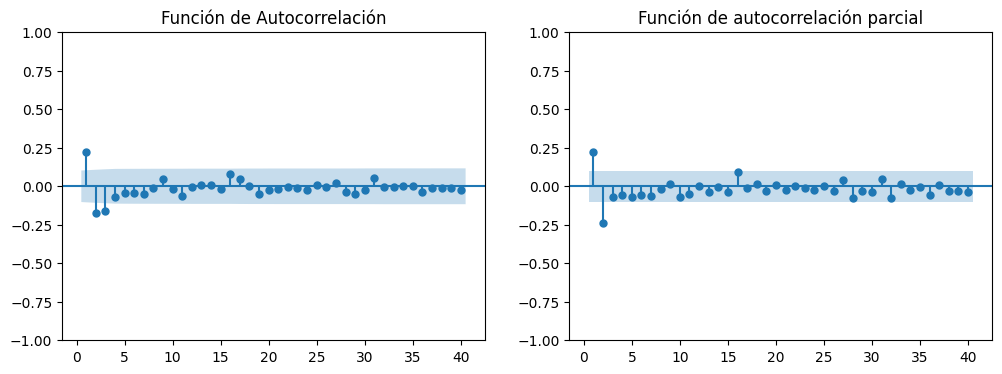

In [47]:
#Gráficas de autocorrelación y de autocorrelación parcial
ig, ax=plt.subplots(1,2,figsize=(12,4))
plot_acf(igae_sa['IGAE_DIFF'].dropna(),zero=False,lags=40,ax=ax[0],title='Función de Autocorrelación')
ax[0].set_ylim(-1,1)
plot_pacf(igae_sa['IGAE_DIFF'].dropna(),zero=False,lags=40,ax=ax[1],title='Función de autocorrelación parcial')
ax[1].set_ylim(-1,1);

In [49]:
#AR(1)
modelo_prueba=ARIMA(igae_sa['IGAE_DIFF'].dropna(),order=(1,0,0))
resultadop=modelo_prueba.fit()
print(resultadop.summary())

                               SARIMAX Results                                
Dep. Variable:              IGAE_DIFF   No. Observations:                  366
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -602.265
Date:                Mon, 16 Oct 2023   AIC                           1210.530
Time:                        16:26:49   BIC                           1222.238
Sample:                    02-01-1993   HQIC                          1215.182
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1303      0.118      1.100      0.271      -0.102       0.363
ar.L1          0.2219      0.027      8.070      0.000       0.168       0.276
sigma2         1.5731      0.021     74.742      0.0

Modelo de pruaba de AR(1)
$$ Y_t=0.2219*Y_{t-1}+\varepsilon_t $$

In [ ]:
# vamos a estimar varios modelos y que se guarde el AIC BIC
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(igae_sa['IGAE_DIFF'].dropna(), order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]
 
ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])

In [55]:
ic.sort_values('AIC').head()

,,AIC,BIC
AR,MA,,
3,1,1183.372566,1206.788366
1,4,1184.843160,1212.161593
3,2,1184.880297,1212.198730
4,1,1185.021103,1212.339536
1,5,1186.229362,1217.450429


Priemras diferencias es un ARIMA(3,0,1)=ARMA(3,1)

IGAE_DESE ARIMA(3,1,1)